Use existing features transformed and new features generated. Build the best tree based model you could. You can use xgboost or other library you choose.

In [6]:
loan <- read.csv("loan.csv", stringsAsFactors = FALSE)
loanT <- loan

leave out features with missing values over 80%

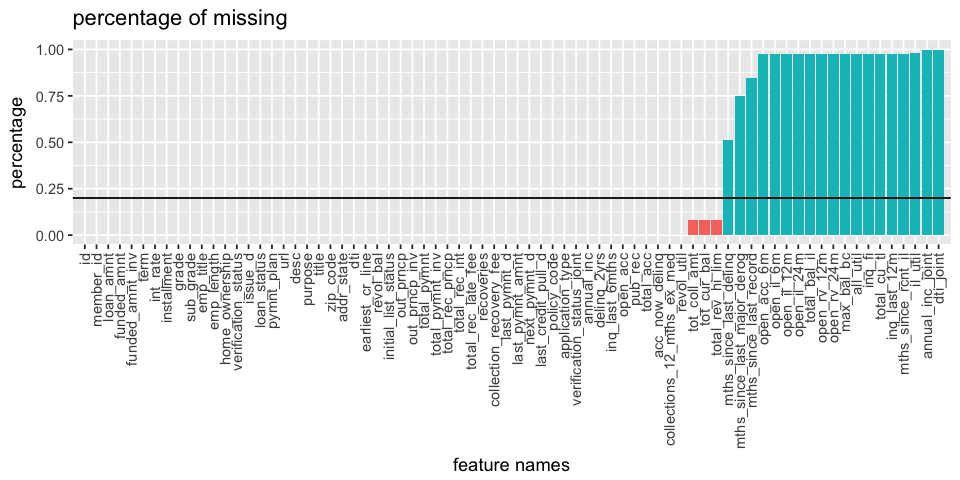

In [7]:
library(ggplot2)
num.NA <- sort(colSums(sapply(loan, is.na)))
dfnum.NA <- data.frame(ind = c(1:length(num.NA)),
                       percentage = num.NA/nrow(loan),
                       per80 = num.NA/nrow(loan)>=0.2,
                           name = names(num.NA),
                       row.names = NULL) # convert to data.frame
options(repr.plot.width=8, repr.plot.height=4)
ggplot(data = dfnum.NA, aes(x=ind, y=percentage)) + 
  geom_bar(aes(fill=per80), stat="identity") + 
  scale_x_discrete(name ="feature names", 
                   limits=dfnum.NA$name)+
  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none") +
  geom_hline(yintercept = 0.2) + 
  ggtitle("percentage of missing")

In [8]:
#annual_inc_joint and dti_joint implement 
loan$dti <- ifelse(!is.na(loan$dti_joint), loan$dti_joint, loan$dti)
loan$annual_inc <- ifelse(!is.na(loan$annual_inc_joint), loan$annual_inc_joint, loan$annual_inc)
#implement NA (and 0 if doesn't make sense) value with mean value
loan$annual_inc[which(is.na(loan$annual_inc) | (loan$annual_inc == 0) | is.nan(loan$annual_inc) | is.infinite(loan$annual_inc) )] <- mean(loan$annual_inc, na.rm=T)
loan$delinq_2yrs[which(is.na(loan$delinq_2yrs)| is.nan(loan$delinq_2yrs) | is.infinite(loan$delinq_2yrs) )] <- mean(loan$delinq_2yrs, na.rm=T)
loan$inq_last_6mths[which(is.na(loan$inq_last_6mths)| is.nan(loan$inq_last_6mths) | is.infinite(loan$inq_last_6mths) )] <- mean(loan$inq_last_6mths, na.rm=T)
loan$collections_12_mths_ex_med[which(is.na(loan$collections_12_mths_ex_med)| is.nan(loan$collections_12_mths_ex_med) | is.infinite(loan$collections_12_mths_ex_med) )] <- mean(loan$collections_12_mths_ex_med, na.rm=T)
loan$open_acc[which(is.na(loan$open_acc)| is.nan(loan$open_acc) | is.infinite(loan$open_acc) )] <- mean(loan$open_acc, na.rm=T)
loan$pub_rec[which(is.na(loan$pub_rec)| is.nan(loan$pub_rec) | is.infinite(loan$pub_rec) )] <- mean(loan$pub_rec, na.rm=T)
loan$revol_util[which(is.na(loan$revol_util)| is.nan(loan$revol_util) | is.infinite(loan$revol_util) )] <- mean(loan$revol_util, na.rm=T)
loan$total_acc[which(is.na(loan$total_acc)| is.nan(loan$total_acc) | is.infinite(loan$total_acc) )] <- mean(loan$total_acc, na.rm=T)
loan$acc_now_delinq[which(is.na(loan$acc_now_delinq)| is.nan(loan$acc_now_delinq) | is.infinite(loan$acc_now_delinq) )] <- mean(loan$acc_now_delinq, na.rm=T)
loan$tot_coll_amt[which(is.na(loan$tot_coll_amt)| is.nan(loan$tot_coll_amt) | is.infinite(loan$tot_coll_amt) )] <- mean(loan$tot_coll_amt, na.rm=T)
loan$tot_cur_bal[which(is.na(loan$tot_cur_bal)| is.nan(loan$tot_cur_bal) | is.infinite(loan$tot_cur_bal) )] <- mean(loan$tot_cur_bal, na.rm=T)
loan$total_rev_hi_lim[which(is.na(loan$total_rev_hi_lim)| is.nan(loan$total_rev_hi_lim) | is.infinite(loan$total_rev_hi_lim) )] <- mean(loan$total_rev_hi_lim, na.rm=T)

In [9]:
loan[, as.character(dfnum.NA$name[dfnum.NA$per80])] <- NULL

feature variance

In [10]:
#compare unique and not NA
data.frame(apply(loan, 2, function(x){length(unique(x))}),apply(loan, 2, function(x){sum(!is.na(x))}))

,apply.loan..2..function.x...,apply.loan..2..function.x....1
id,887379,887379
member_id,887379,887379
loan_amnt,1372,887379
funded_amnt,1372,887379
funded_amnt_inv,9729,887379
term,2,887379
int_rate,542,887379
installment,68711,887379
grade,7,887379
sub_grade,35,887379


In [11]:
# remove all unique and the feature need NLP (desc)
loan[, c("id", "member_id", "url", "desc")] <- NULL

In [12]:
# drop loan payment features, which happend after interest rate initiation (except for loan_amnt)
loan[, c("installment", "funded_amnt", "funded_amnt_inv",
         "last_pymnt_amnt", "last_pymnt_d", "next_pymnt_d",
         "pymnt_plan", "recoveries", "total_pymnt", 
         "total_pymnt_inv", "total_rec_int", "total_rec_late_fee",
         "total_rec_prncp", "collection_recovery_fee", "out_prncp", "out_prncp_inv")] <- NULL

In [13]:
# drop potential response variables, not features
loan[, c("grade", "sub_grade", "loan_status")] <- NULL
#drop only one variables (policy_code)
loan[, c("policy_code")] <- NULL

In [14]:
table(loan$verification_status)


   Not Verified Source Verified        Verified 
         266750          329558          291071 

In [15]:
aov.res = aov(int_rate ~ factor(verification_status), na.action = na.omit, data = loan, )
summary(aov.res)

                                Df   Sum Sq Mean Sq F value Pr(>F)    
factor(verification_status)      2  1080177  540089   30032 <2e-16 ***
Residuals                   887376 15958157      18                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [16]:
table(loan$verification_status_joint)


                   Not Verified Source Verified        Verified 
         886868             283              61             167 

In [17]:
aov.res = aov(int_rate ~ factor(verification_status_joint), na.action = na.omit, data = loan, )
summary(aov.res)

                                      Df   Sum Sq Mean Sq F value Pr(>F)    
factor(verification_status_joint)      3     2825   941.7   49.05 <2e-16 ***
Residuals                         887375 17035509    19.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [18]:
#drop two features have no clear pattern with int_rate
loan[, c("verification_status", "verification_status_joint")] <- NULL

start to build model

In [19]:
#show all the selected features
colnames(loan)

[1] "loan_amnt"                  "term"                      
 [3] "int_rate"                   "emp_title"                 
 [5] "emp_length"                 "home_ownership"            
 [7] "annual_inc"                 "issue_d"                   
 [9] "purpose"                    "title"                     
[11] "zip_code"                   "addr_state"                
[13] "dti"                        "delinq_2yrs"               
[15] "earliest_cr_line"           "inq_last_6mths"            
[17] "open_acc"                   "pub_rec"                   
[19] "revol_bal"                  "revol_util"                
[21] "total_acc"                  "initial_list_status"       
[23] "last_credit_pull_d"         "collections_12_mths_ex_med"
[25] "application_type"           "acc_now_delinq"            
[27] "tot_coll_amt"               "tot_cur_bal"               
[29] "total_rev_hi_lim"

In [20]:
#feature engineering on earliest_cr_line: merge the data with old years (before 1976)
library(zoo)
loan$earliest_cr_line_1 <- as.Date(as.yearmon(loan$earliest_cr_line, "%b-%Y"))
loan$earliest_cr_line_year <- format(loan$earliest_cr_line_1, '%Y')
loan$gen_earliest_cr_line_year <- loan$earliest_cr_line_year
loan[which(loan$earliest_cr_line_year %in% c(1:1976)), "gen_earliest_cr_line_year"] = "1976"

loan$gen_earliest_cr_line_year[which(is.na(loan$gen_earliest_cr_line_year))] = 
round(mean(as.numeric(loan$gen_earliest_cr_line_year), na.rm=T))  #replace NA with mean


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Warning message in strptime(x, format, tz = "GMT"):
“unknown timezone 'default/America/Chicago'”

In [21]:
#feature engineering on issue_d: merge the data with old years (before 1976)
library(zoo)
loan$gen_issue_d <- as.Date(as.yearmon(loan$issue_d, "%b-%Y"))
loan$gen_issue_year <- as.character(format(loan$gen_issue_d, "%Y"))
loan$gen_issue_mon <- as.character(format(loan$gen_issue_d, "%m"))

In [22]:
table(loan$home_ownership)


     ANY MORTGAGE     NONE    OTHER      OWN     RENT 
       3   443557       50      182    87470   356117 

In [23]:
# feature engineering on home_ownership: binning "ANY", "NONE", "OTHER"
loan$gen_home_ownership = loan$home_ownership
loan$gen_home_ownership[loan$home_ownership %in% c("ANY", "NONE", "OTHER")] = "others"

In [24]:
# feature engineering on emp_length : split emp_length to < 5 ; >= 5
loan$gen_emp_length_sim = NA
loan[which(loan$emp_length %in% c('10+ years', '8 years','9 years','5 years','6 years','7 years')), "gen_emp_length_sim"] = ">= 5"
loan[which(loan$emp_length %in% c('< 1 year', '1 year','2 years','3 years','4 years')), "gen_emp_length_sim"] = "< 5"

In [25]:
# feature engineering on last_credit_pull_d
library("zoo")
loan$last_credit_pull_date = as.Date(as.yearmon(loan$last_credit_pull_d, "%b-%Y"))

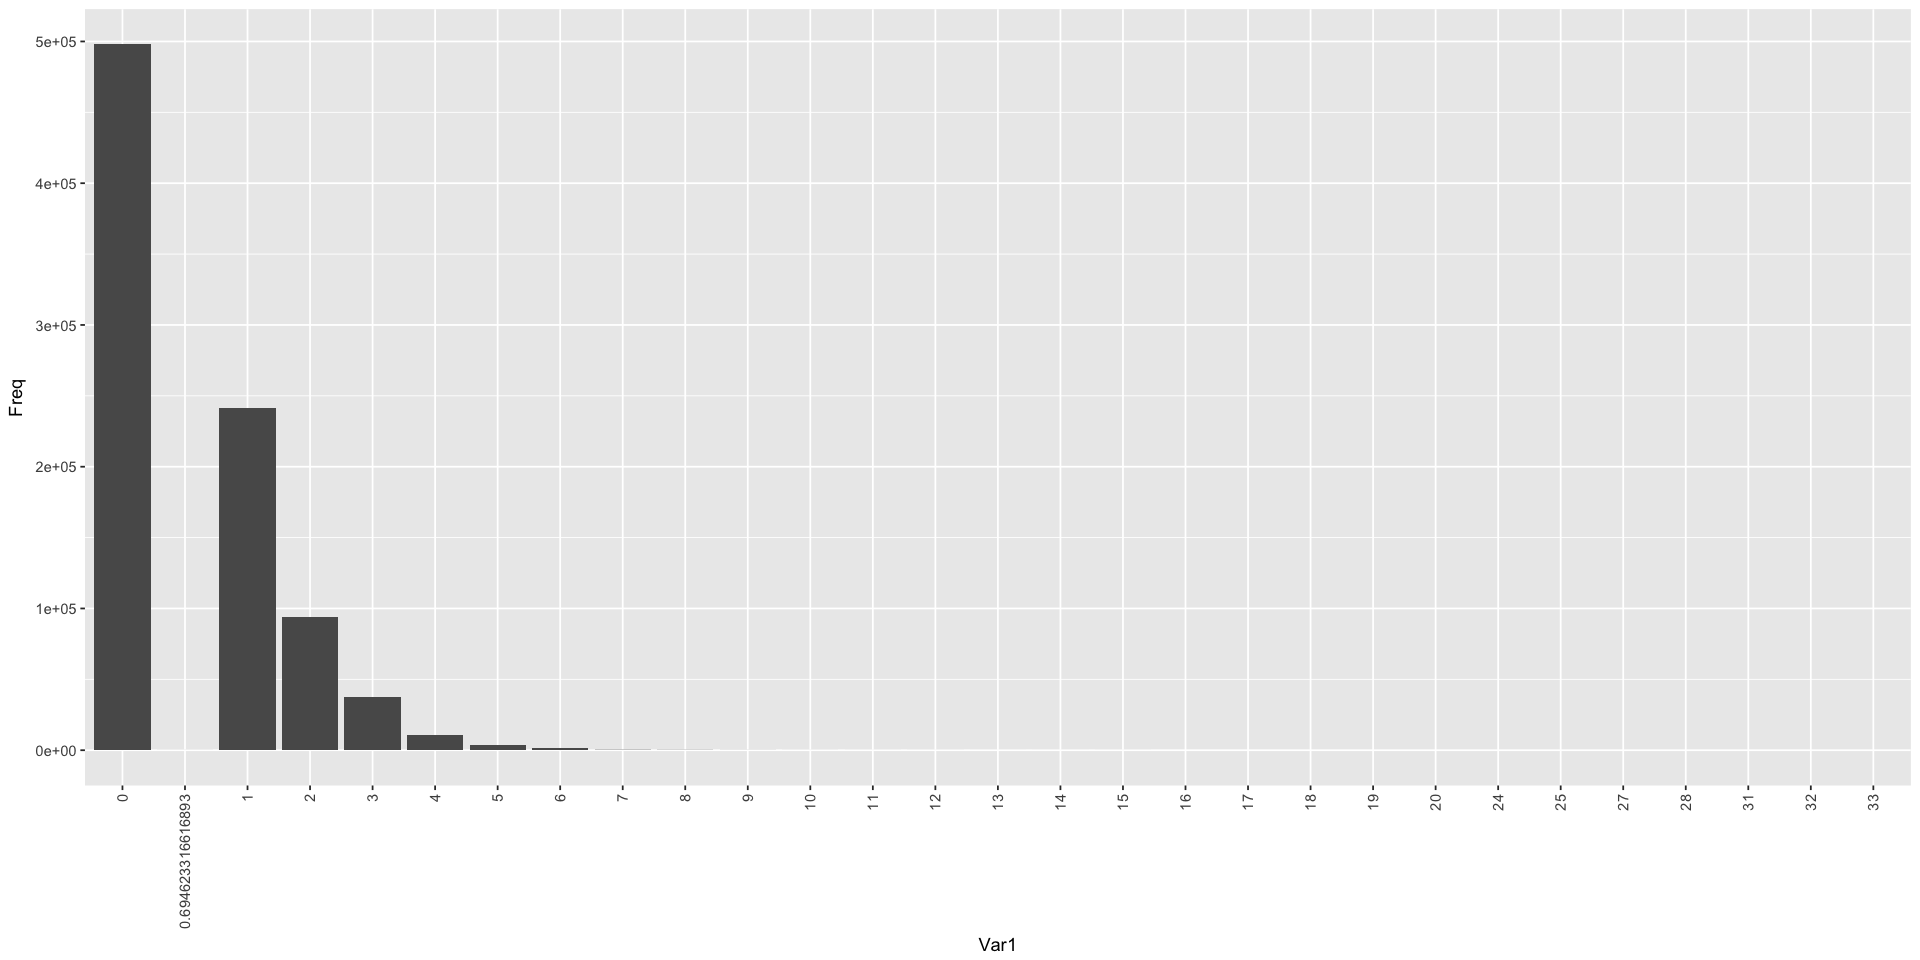

In [26]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$inq_last_6mths)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [27]:
# feature engineering on inq_last_6mths: binning: > 4 is 5
loan$gen_inq_last_6mths = loan$inq_last_6mths
loan$gen_inq_last_6mths[loan$inq_last_6mths > 4] = 5

In [28]:
# possible : feature engineering combine zip_code and addr_state to generate more accurate address
loan$gen_add_state_zip = paste(loan$addr_state, as.character(loan$zip_code))
add_state_zip.ave_rate = by(loan$int_rate, loan$gen_add_state_zip, median)
loan$gen_add_state_zip_ave_rate = unlist(apply(loan, 1, 
                                               function(x){return(add_state_zip.ave_rate[x["gen_add_state_zip"]])}))

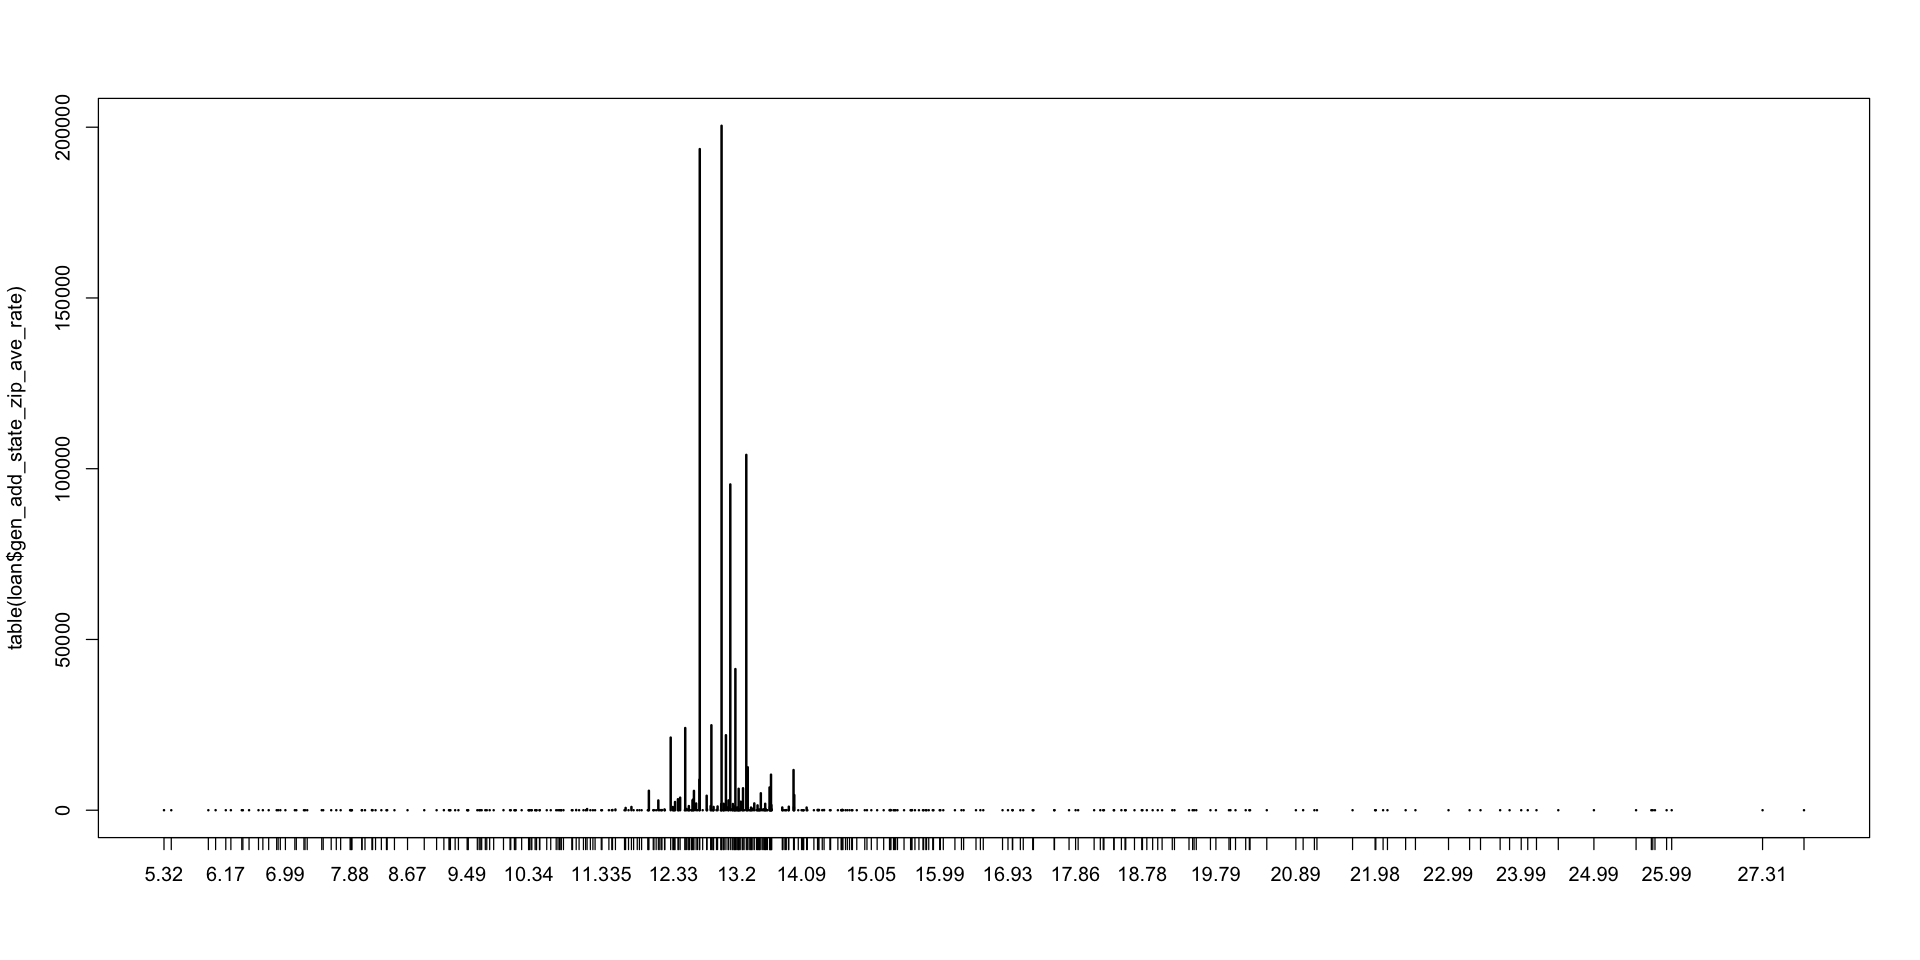

In [29]:
plot(table(loan$gen_add_state_zip_ave_rate))

In [30]:
# split data into train and test for model performance
set.seed(11)
train.ind <- sample(1:dim(loan)[1], 0.7 * dim(loan)[1])
train <- loan[train.ind, ]
test <- loan[-train.ind, ]

In [31]:
# decision tree
# https://www.r-bloggers.com/a-brief-tour-of-the-trees-and-forests/
library(rpart)
# as.character and as.factor are treated same in the rpart function

In [32]:
train.sub <- train[, c('loan_amnt','term','int_rate','annual_inc','purpose','dti','delinq_2yrs',
                       'open_acc','pub_rec','revol_util','total_acc','initial_list_status',
                       'collections_12_mths_ex_med','application_type','acc_now_delinq','tot_coll_amt',
                       'tot_cur_bal','total_rev_hi_lim','gen_emp_length_sim','gen_home_ownership','gen_earliest_cr_line_year',
                       'gen_add_state_zip_ave_rate','gen_inq_last_6mths','last_credit_pull_date','gen_issue_d')]

In [33]:
#select existing features transformed and new features generated
formula <- paste("int_rate ~ loan_amnt + term + annual_inc + 
    purpose + dti + delinq_2yrs + open_acc + pub_rec + revol_util + 
    total_acc + initial_list_status + last_credit_pull_date + 
    collections_12_mths_ex_med + application_type + acc_now_delinq + 
    tot_coll_amt + tot_cur_bal + total_rev_hi_lim + gen_earliest_cr_line_year + 
    gen_issue_d + gen_home_ownership + gen_emp_length_sim + gen_inq_last_6mths+ gen_add_state_zip_ave_rate")
# method = 'anova' for regression
tree0 <- rpart(formula, method = 'anova', data = train.sub, 
               control=rpart.control(cp = 0.01))

In [34]:
printcp(tree0)
# display the cross validation result
# rel error = sum of squared over all leaf nodes of train data / sum of squared at root node
# xerror = sum of squared over all leaf nodes of left over data / sum of squared at root node


Regression tree:
rpart(formula = formula, data = train.sub, method = "anova", 
    control = rpart.control(cp = 0.01))

Variables actually used in tree construction:
[1] gen_inq_last_6mths revol_util         term               total_rev_hi_lim  

Root node error: 11922623/621165 = 19.194

n= 621165 

        CP nsplit rel error  xerror      xstd
1 0.182429      0   1.00000 1.00000 0.0017253
2 0.039677      1   0.81757 0.81757 0.0013916
3 0.022075      2   0.77789 0.77791 0.0013466
4 0.015001      3   0.75582 0.75599 0.0013376
5 0.014393      4   0.74082 0.74099 0.0013191
6 0.010000      5   0.72643 0.72660 0.0012948


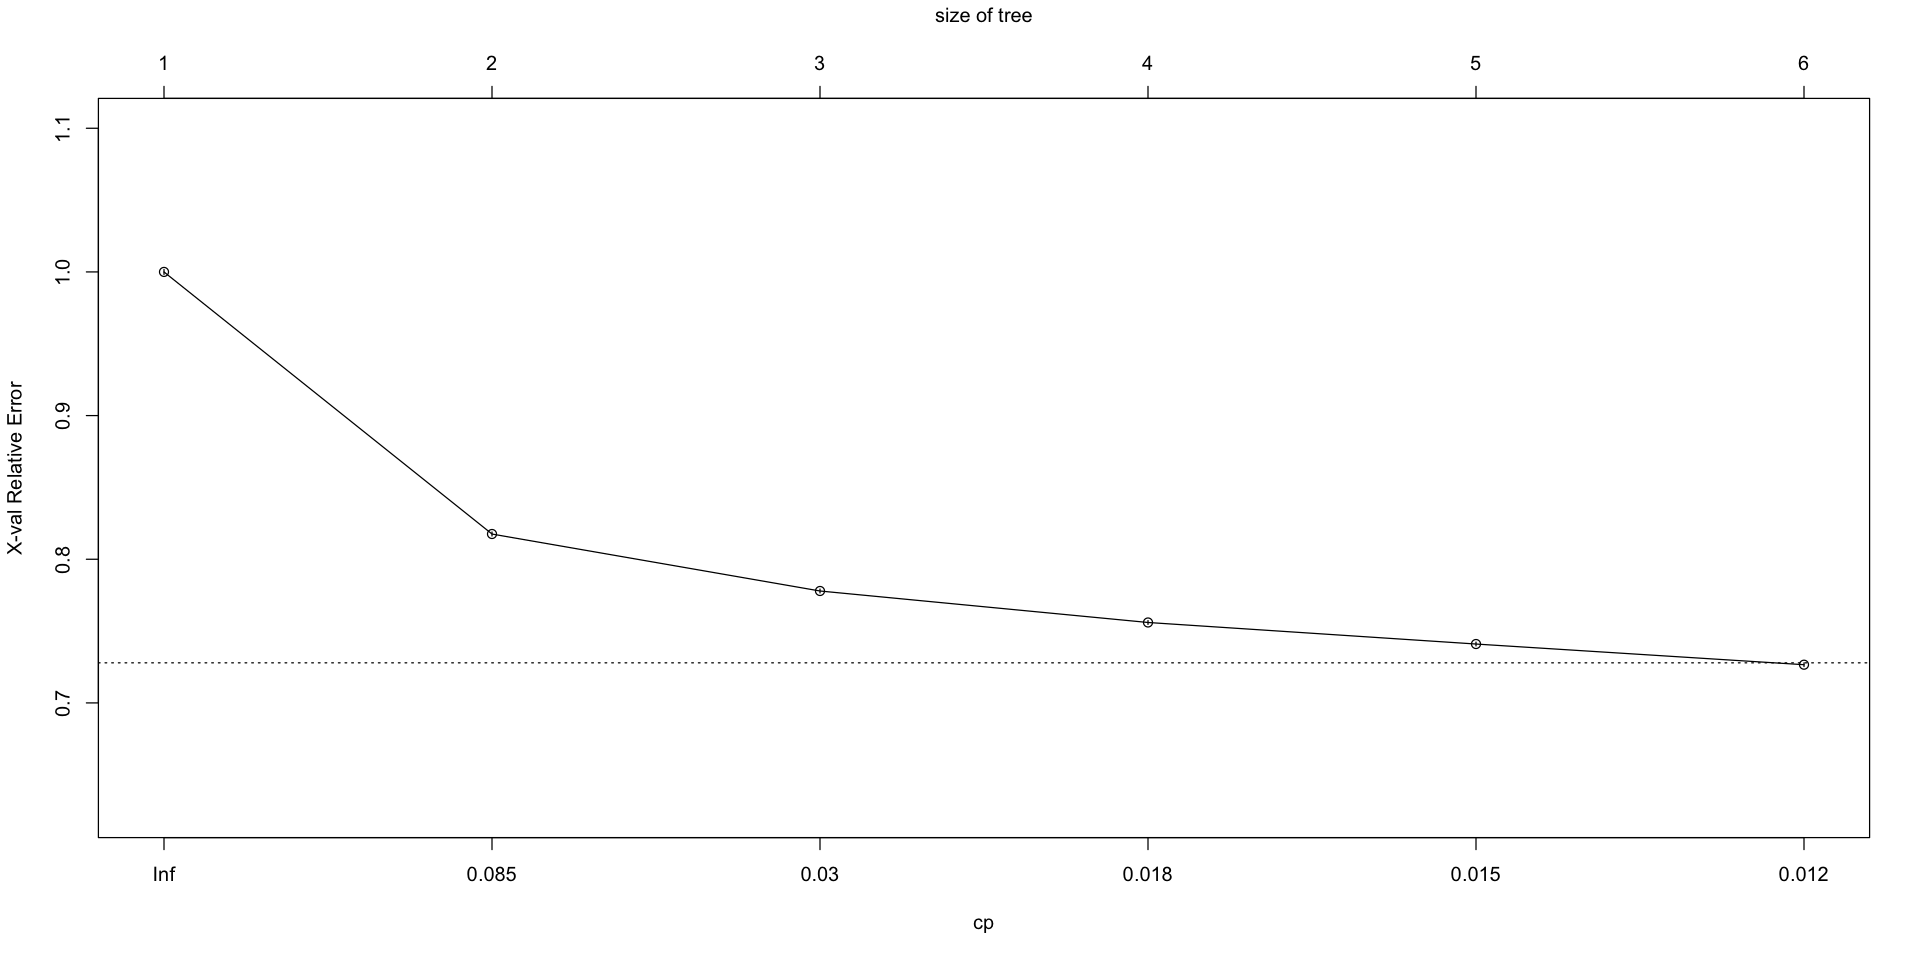

In [35]:
plotcp(tree0) 
# plot xerror

In [36]:
# step 2 Pick the tree size that mBinimizes xerror.
# Hence we want the cp value that minimizes the xerror.
bestcp <- tree0$cptable[which.min(tree0$cptable[,"xerror"]), "CP"]
bestcp

[1] 0.01

In [37]:
# But simpler model, as long as the xerror - 1std, xerror + 1std contains xerror_min
cp.tab <- as.data.frame(tree0$cptable)
with(cp.tab, min(which(xerror - 2*xstd < min(xerror))))
bestcp <- cp.tab$CP[with(cp.tab, min(which(xerror - xstd < min(xerror))))]
bestcp

[1] 6

[1] 0.01

In [38]:
# Step 3: Prune the tree using the best cp.
tree.pruned <- prune(tree0, cp = bestcp)
tree.pruned

n= 621165 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 621165 11922620 13.247860  
   2) term= 36 months 434683  6452306 12.022230  
     4) total_rev_hi_lim>=22997 226431  3078349 11.021780  
       8) revol_util< 49.615 111195  1324460  9.924247 *
       9) revol_util>=49.615 115236  1490701 12.080820 *
     5) total_rev_hi_lim< 22997 208252  2900906 13.110010  
      10) gen_inq_last_6mths< 0.5 116966  1485522 12.291310 *
      11) gen_inq_last_6mths>=0.5 91286  1236532 14.159020 *
   3) term= 60 months 186482  3295288 16.104770  
     6) gen_inq_last_6mths< 0.5 105162  1683595 15.261210 *
     7) gen_inq_last_6mths>=0.5 81320  1440088 17.195660 *

In [39]:
test.pred <- predict(tree.pruned, test)
sqrt(sum((test.pred - test$int_rate)^2) / length(test.pred)) # 3.7

[1] 3.728946

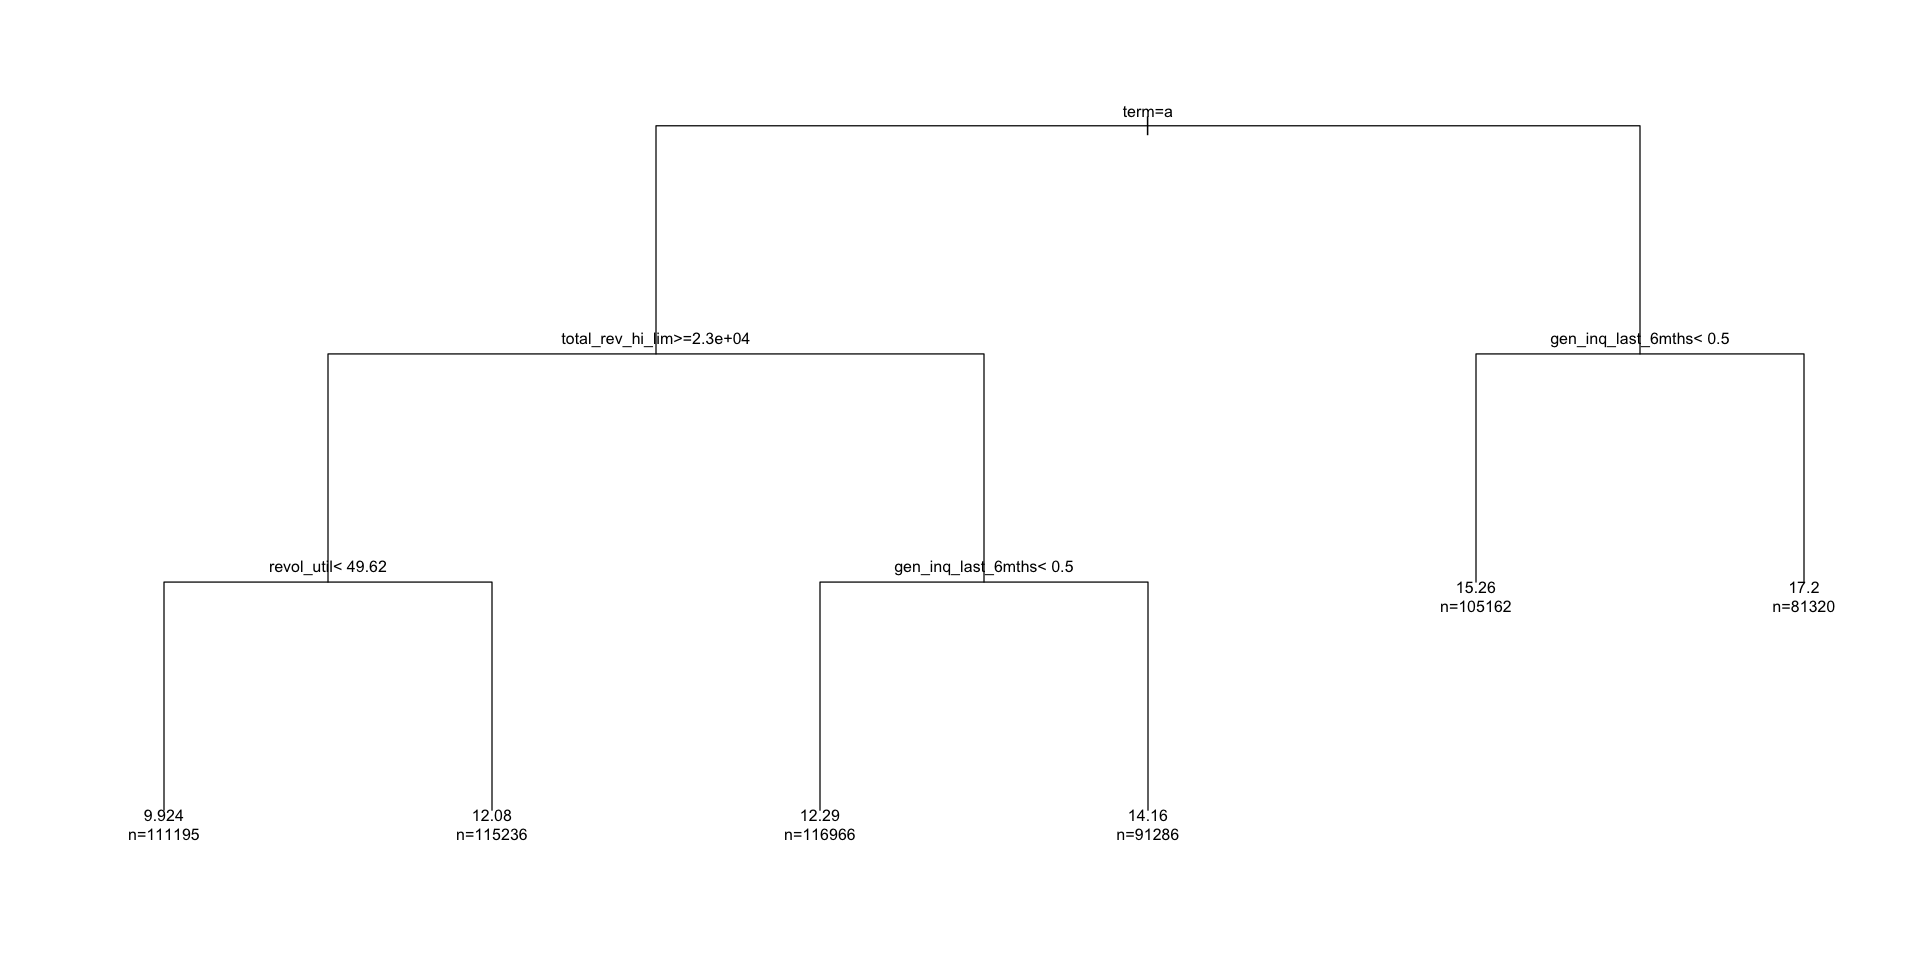

In [40]:
# no uniform, the length of branch indicates decrease of deviance
plot(tree.pruned, uniform = TRUE) 
# Since labels often extend outside the plot region it can be helpful to specify xpd = TRUE
text(tree.pruned, cex = 0.8, use.n = TRUE, xpd = TRUE)

In [86]:
# random forest
library(randomForest)
# delete features with NA terms and over 53 variables
train.sub.rf <- train[, c('int_rate','loan_amnt','term','annual_inc','dti','delinq_2yrs',
                       'open_acc','pub_rec','revol_util','total_acc','initial_list_status',
                       'collections_12_mths_ex_med','application_type','acc_now_delinq',
                       'gen_home_ownership','gen_earliest_cr_line_year',
                       'gen_inq_last_6mths')]
# Categorical featues need to be factors when using randomForest
train.sub.rf$gen_home_ownership <- as.factor(train.sub.rf$gen_home_ownership)
train.sub.rf$term <- as.factor(train.sub.rf$term)
train.sub.rf$initial_list_status <- as.factor(train.sub.rf$initial_list_status)
train.sub.rf$application_type <- as.factor(train.sub.rf$application_type)
set.seed(7)

In [87]:
rf <- randomForest(x = train.sub.rf[, -1], y = train.sub.rf[, 1], importance = TRUE,
                   do.trace = TRUE, nodesize = 6200, ntree = 10)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 |    13.04    67.94 |
   2 |    12.86    67.01 |
   3 |    12.67    66.01 |
   4 |    12.63    65.80 |
   5 |    12.51    65.18 |
   6 |    12.44    64.83 |
   7 |    12.39    64.56 |
   8 |    12.35    64.35 |
   9 |    12.32    64.20 |
  10 |    12.26    63.88 |


,%IncMSE
loan_amnt,6.977180
term,27.265862
annual_inc,11.743923
dti,4.654151
delinq_2yrs,5.630464
open_acc,2.473683
pub_rec,3.608692
revol_util,12.659419
total_acc,3.653042
initial_list_status,11.657667


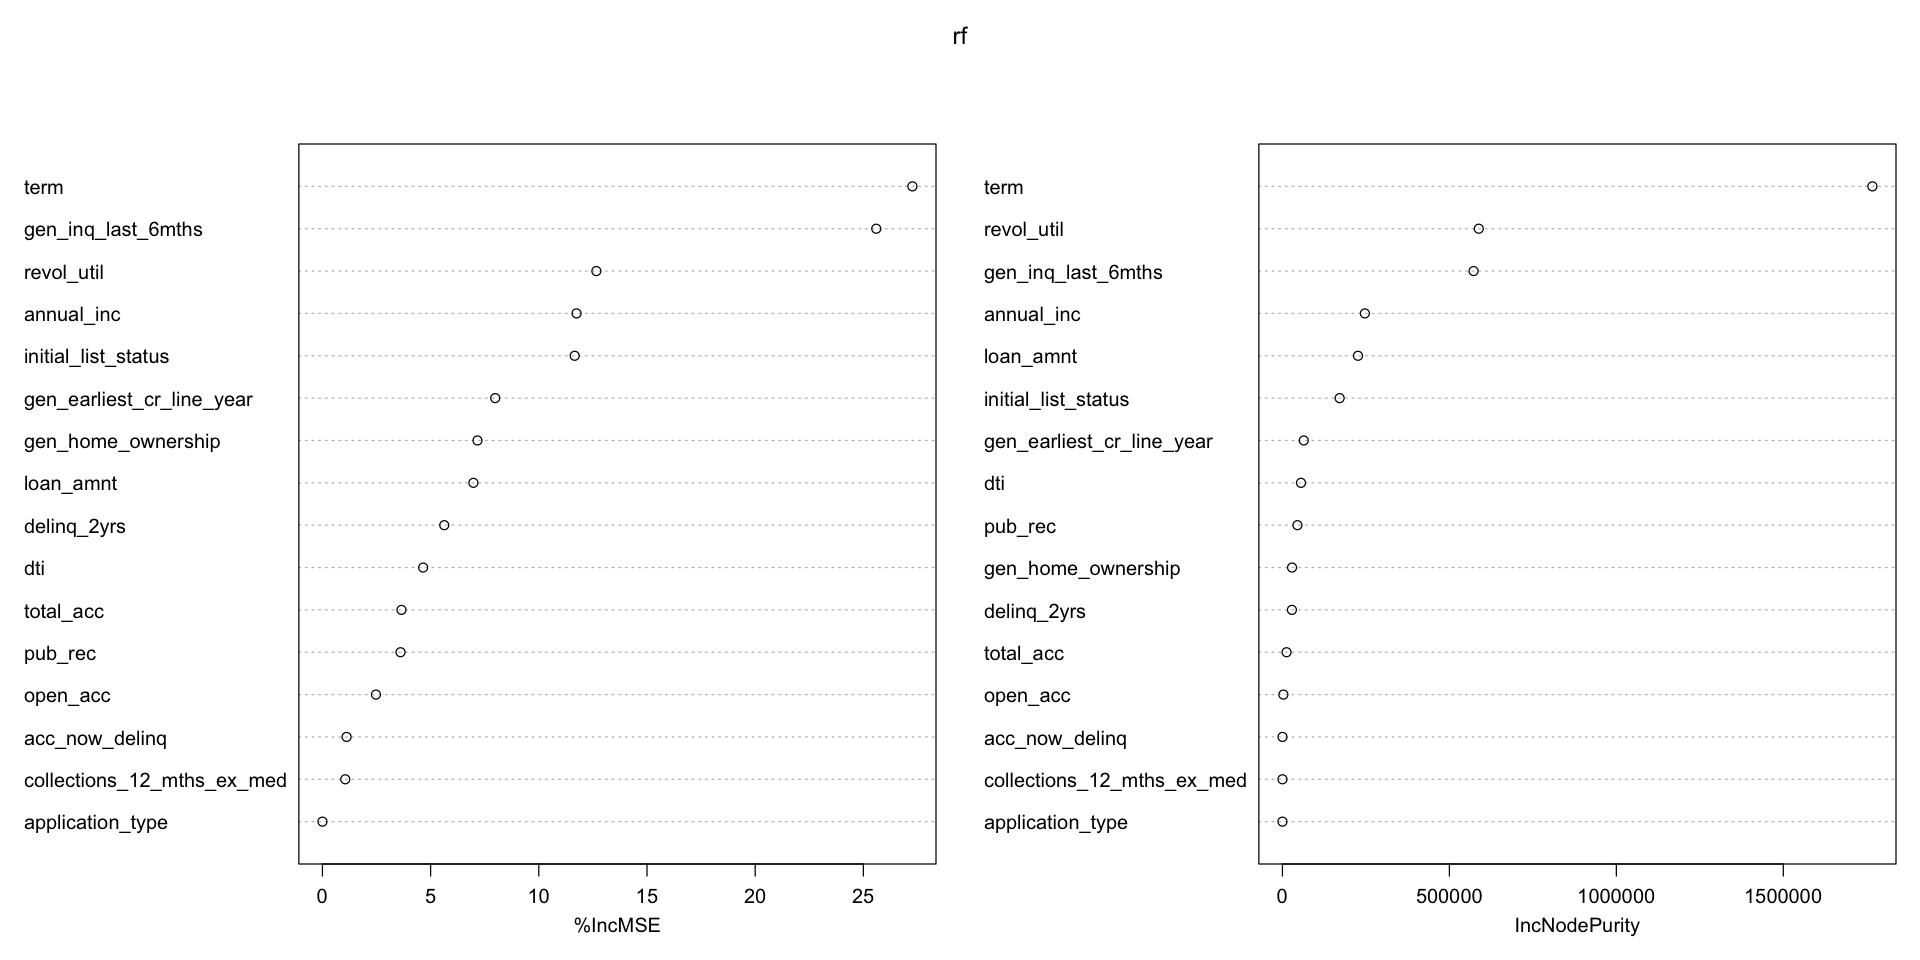

In [88]:
varImpPlot(rf)
# %IncMSE shows if a variable is assigned values by random permutation, how much will the MSE increase?
# 1 train forest
# 2 measure out-of-bag accuracy -> OOB_acc_base
# 3 permute variable i
# 4 measure out-of-bag accuracy -> OOB_acc_perm_i
# 5 VI_i = - (OOB_acc_perm_i - OOB_acc_base)
# So Higher the value, higher the variable importance.
# IncNodePurity is measured by the difference between sum of squared error before and after the split on that variable.
importance(rf, type = 1) # 2)
# Both accuracy tests to see how worse the model performs without each variable
# The Gini one digs into the mathematics behind decision trees, 
# but essentially measures how pure the nodes are at the end of the tree. 
importanceOrder= order(rf$importance[, "%IncMSE"], decreasing = T)
names=rownames(rf$importance)[importanceOrder]

In [91]:
# redo the random forest with IncMSE higher than 2
library(randomForest)
train.sub2.rf <- train[, c('int_rate','loan_amnt','term','annual_inc','dti','delinq_2yrs',
                       'open_acc','pub_rec','revol_util','total_acc','initial_list_status',
                       'gen_home_ownership','gen_earliest_cr_line_year','gen_inq_last_6mths')]
# Categorical featues need to be factors when using randomForest
train.sub2.rf$gen_home_ownership <- as.factor(train.sub.rf$gen_home_ownership)
train.sub2.rf$term <- as.factor(train.sub.rf$term)
train.sub2.rf$initial_list_status <- as.factor(train.sub.rf$initial_list_status)
set.seed(7)
rf2 <- randomForest(x = train.sub2.rf[, -1], y = train.sub2.rf[, 1], importance = TRUE,
                   do.trace = TRUE, nodesize = 6200, ntree = 10)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 |    12.78    66.59 |
   2 |       13    67.75 |
   3 |    12.76    66.50 |
   4 |    12.61    65.69 |
   5 |    12.49    65.08 |
   6 |    12.39    64.55 |
   7 |    12.34    64.29 |
   8 |    12.27    63.93 |
   9 |    12.21    63.60 |
  10 |    12.17    63.43 |


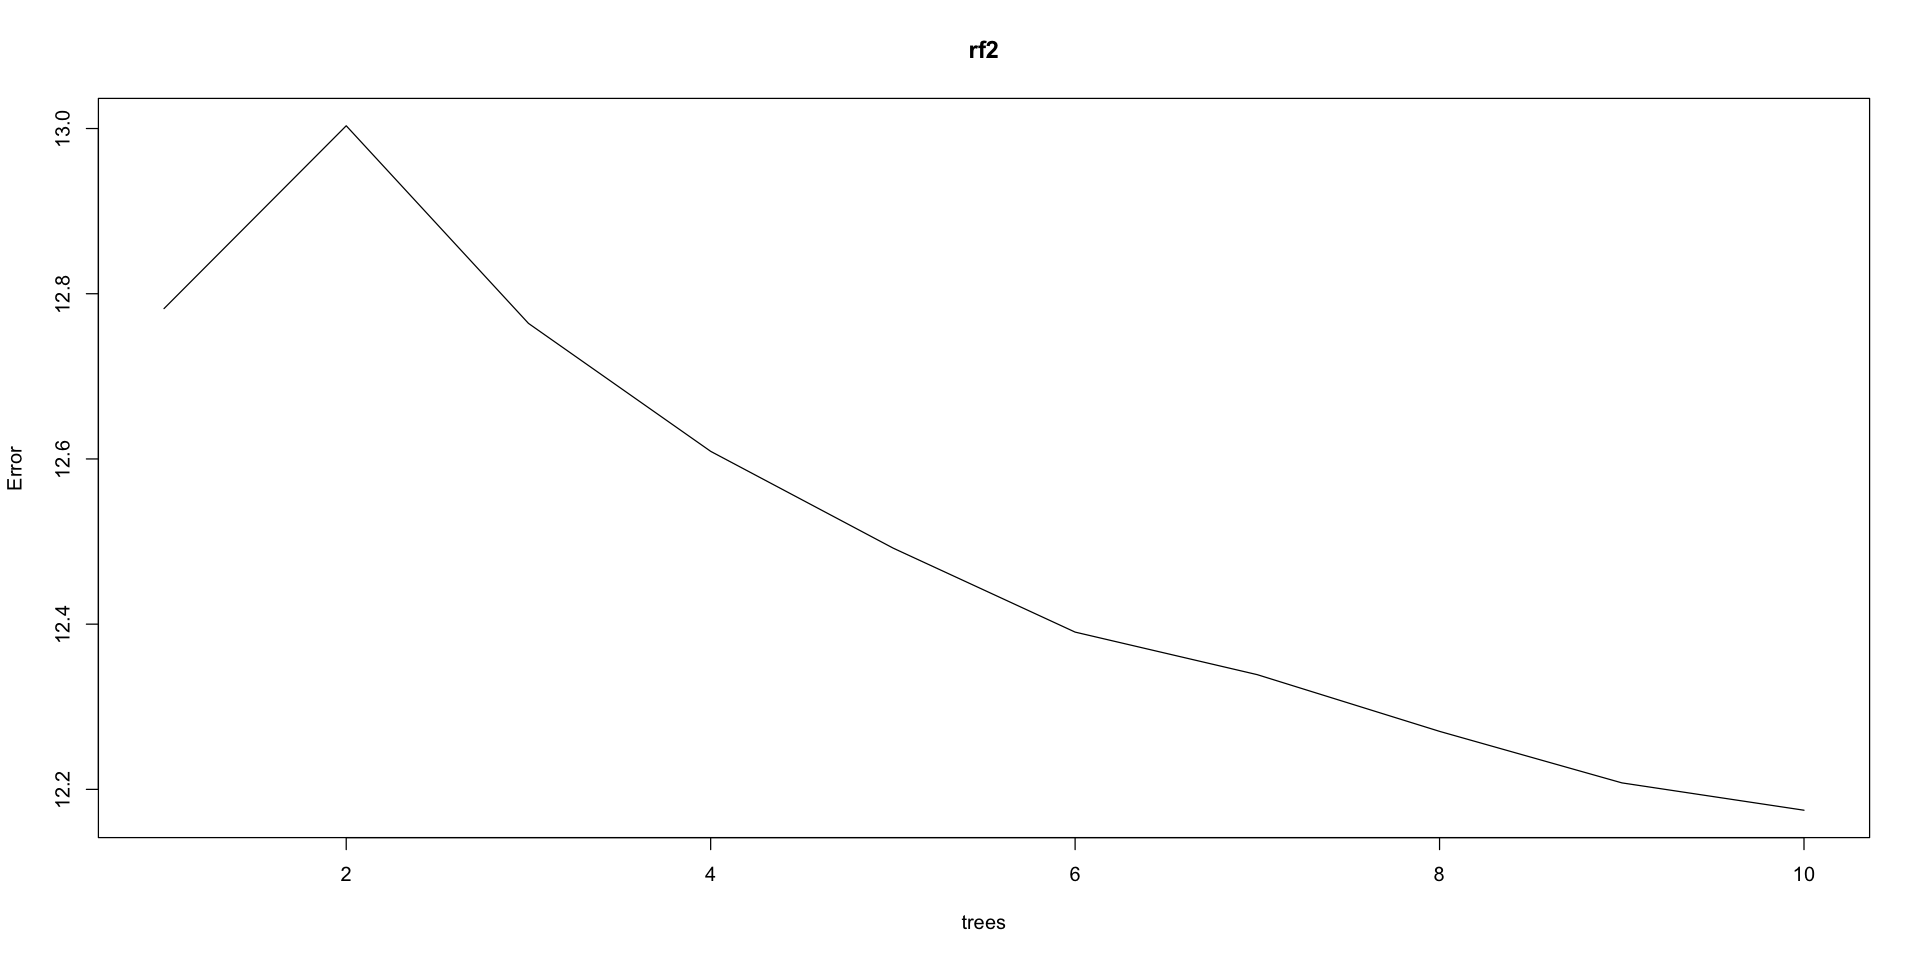

In [92]:
plot(rf2) # see oob error
# Black solid line for overall OOB error. If classification problem, see a bunch of colour lines, one for each class' error
# Can rf get overfitting? Yes.
# Solution: there is also RRF library, or control for how deep the tree could grow,
# say nodesize (Minimum size of terminal nodes) and maxnodes(Maximum number of terminal nodes trees)

In [96]:
# Categorical featues need to be factors when using randomForest
test.rf <- test[, c('int_rate','loan_amnt','term','annual_inc','dti','delinq_2yrs',
                       'open_acc','pub_rec','revol_util','total_acc','initial_list_status',
                       'gen_home_ownership','gen_earliest_cr_line_year','gen_inq_last_6mths')]
# Categorical featues need to be factors when using randomForest
test.rf$gen_home_ownership <- as.factor(test.rf$gen_home_ownership)
test.rf$term <- as.factor(test.rf$term)
test.rf$initial_list_status <- as.factor(test.rf$initial_list_status)
test.pred <- predict(rf2, test.rf)
sqrt(sum((test.pred - test.sub.rf$int_rate)^2) / dim(test.sub.rf)[1]) # 3.75

[1] 3.449848

We can see the random forest model rf2 has less sum of square value than previous tree model. Let's look at a  boosting tree model then.

In [99]:
library(xgboost) 
train.sub.xgb <- train[, c('int_rate','loan_amnt','annual_inc','dti','delinq_2yrs',
                       'open_acc','pub_rec','revol_util','total_acc',
                       'collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt',
                       'tot_cur_bal','total_rev_hi_lim','gen_earliest_cr_line_year','gen_inq_last_6mths')]
train.label <- train.sub.xgb$int_rate
# Xgboost manages only numeric vectors.
feature.matrix <- model.matrix( ~ ., data = train.sub.xgb[, -1]) 

In [100]:
# Remember we removed rows with NA in randomForest fitting. model.matrix will also remove rows with any NA.
set.seed(1)
gbt <- xgboost(data =  feature.matrix, 
               label = train.label, 
               max_depth = 8, # for each tree, how deep it goes
               nround = 20, # number of trees
               objective = "reg:linear",
               nthread = 3,
               verbose = 1)
importance <- xgb.importance(feature_names = colnames(feature.matrix), model = gbt)
importance

[1]	train-rmse:9.806778 
[2]	train-rmse:7.354438 
[3]	train-rmse:5.769238 
[4]	train-rmse:4.794797 
[5]	train-rmse:4.221835 
[6]	train-rmse:3.900540 
[7]	train-rmse:3.721566 
[8]	train-rmse:3.623332 
[9]	train-rmse:3.563924 
[10]	train-rmse:3.530801 
[11]	train-rmse:3.502244 
[12]	train-rmse:3.486573 
[13]	train-rmse:3.468204 
[14]	train-rmse:3.460040 
[15]	train-rmse:3.452929 
[16]	train-rmse:3.447746 
[17]	train-rmse:3.443326 
[18]	train-rmse:3.438544 
[19]	train-rmse:3.433138 
[20]	train-rmse:3.430435 


Feature,Gain,Cover,Frequency
loan_amnt,2.167714e-01,2.121149e-01,0.1982869379
revol_util,1.963176e-01,1.132906e-01,0.0907922912
total_rev_hi_lim,1.754334e-01,1.027341e-01,0.1344753747
gen_inq_last_6mths,1.691730e-01,8.391011e-02,0.0385438972
annual_inc,9.261233e-02,7.045112e-02,0.1190578158
dti,4.063065e-02,4.728629e-02,0.0758029979
open_acc,2.982896e-02,8.904158e-02,0.0792291221
tot_cur_bal,2.215698e-02,3.644779e-02,0.0839400428
delinq_2yrs,1.658780e-02,2.769776e-02,0.0224839400
total_acc,1.324742e-02,4.199167e-02,0.0535331906


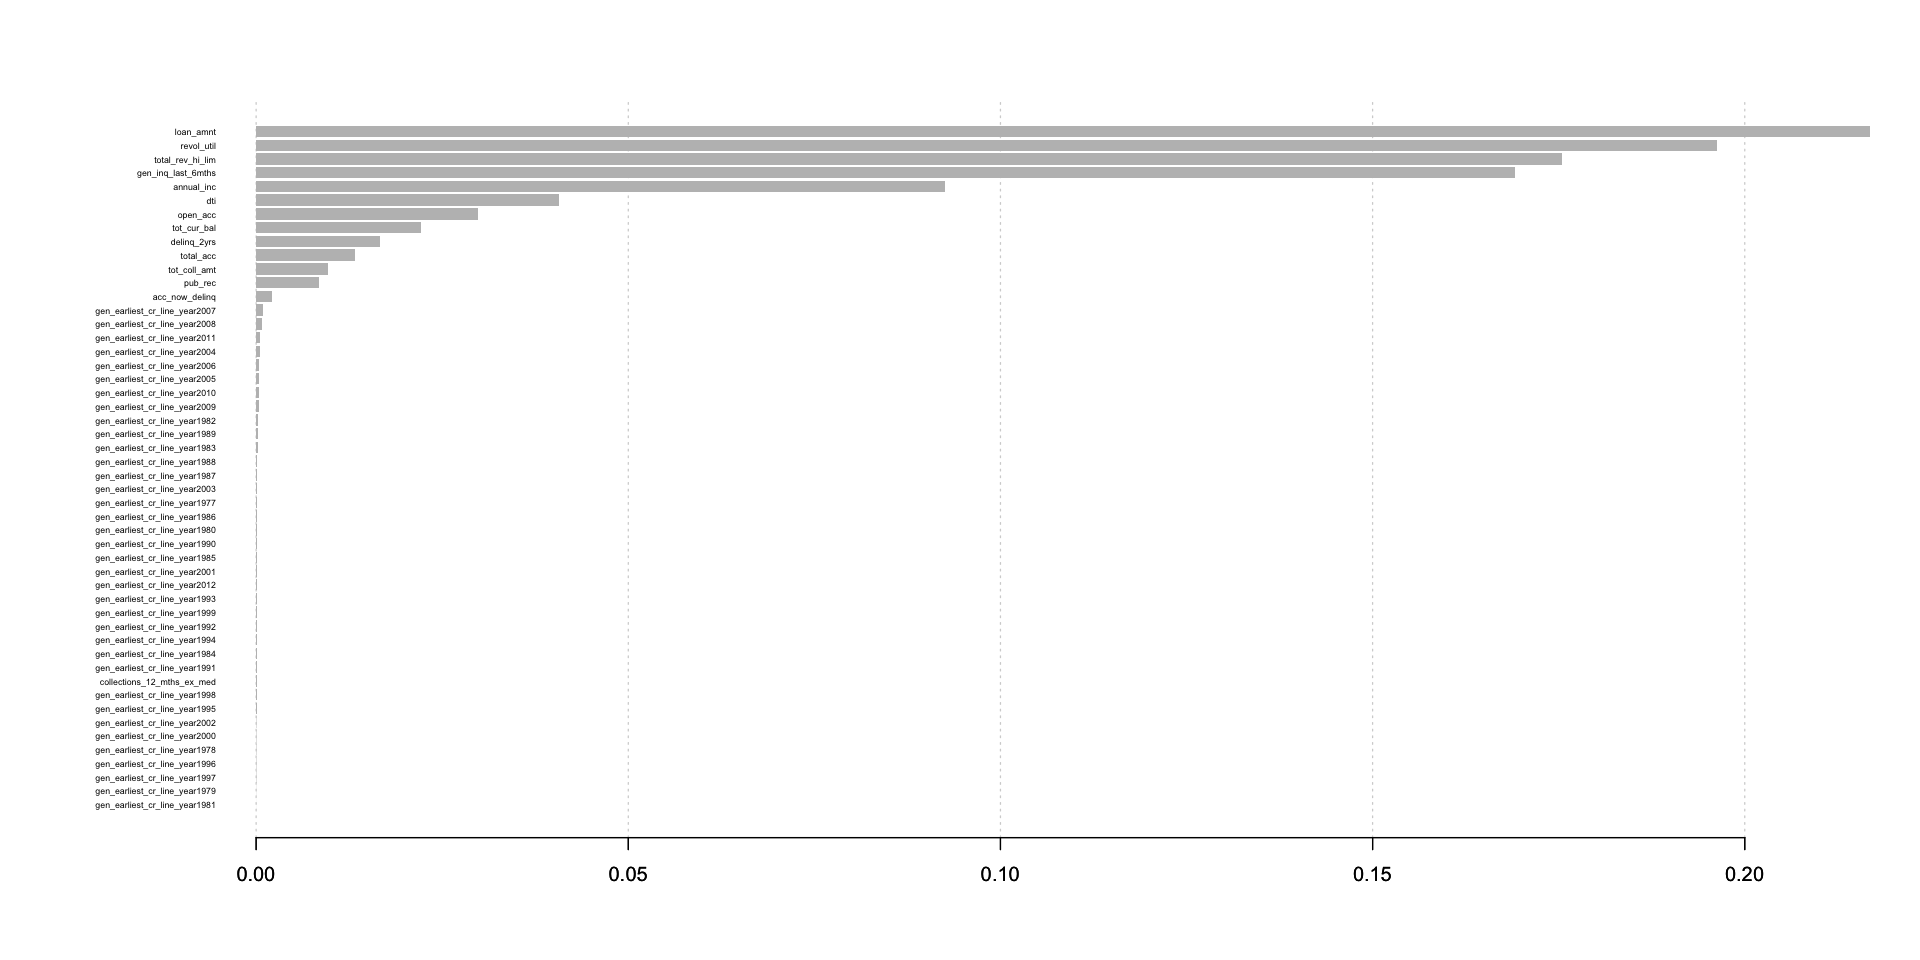

In [101]:
xgb.plot.importance(importance)
# Gain: contribution of each feature to the model. improvement in accuracy brought by a feature to the branches it is on.
#       For boosted tree model, gain of each feature in each branch of each tree is taken into account, 
#       then average per feature to give a vision of the entire model.
#       Highest percentage means important feature to predict the label used for the training.
# Cover: the number of observation through a branch using this feature as split feature 

In [111]:
# what's the optimal parameter, for example, number of trees?
par <- list( max_depth = 8,
             objective = "reg:linear",
             nthread = 3,
             verbose = 2)
gbt.cv <- xgb.cv(params = par,
                 data = feature.matrix, label = train.label,
                 nfold = 5, nrounds = 30)

[1]	train-rmse:9.806493+0.001853	test-rmse:9.808539+0.008357 
[2]	train-rmse:7.353568+0.001028	test-rmse:7.359370+0.008176 
[3]	train-rmse:5.769207+0.000590	test-rmse:5.780002+0.009321 
[4]	train-rmse:4.791566+0.001196	test-rmse:4.808042+0.007835 
[5]	train-rmse:4.219252+0.001157	test-rmse:4.242168+0.007604 
[6]	train-rmse:3.894992+0.001286	test-rmse:3.923982+0.007993 
[7]	train-rmse:3.716593+0.001555	test-rmse:3.750578+0.007824 
[8]	train-rmse:3.616885+0.001774	test-rmse:3.654972+0.006237 
[9]	train-rmse:3.558960+0.002812	test-rmse:3.601266+0.006734 
[10]	train-rmse:3.524193+0.002830	test-rmse:3.570083+0.005030 
[11]	train-rmse:3.499867+0.003598	test-rmse:3.548880+0.006461 
[12]	train-rmse:3.484925+0.004964	test-rmse:3.536774+0.007160 
[13]	train-rmse:3.471796+0.003843	test-rmse:3.526842+0.007199 
[14]	train-rmse:3.459062+0.003279	test-rmse:3.517165+0.006844 
[15]	train-rmse:3.450602+0.003370	test-rmse:3.511249+0.006402 
[16]	train-rmse:3.442652+0.003622	test-rmse:3.505873+0.007826 
[

[1]	train-rmse:9.806778 
[2]	train-rmse:7.354438 
[3]	train-rmse:5.769238 
[4]	train-rmse:4.794797 
[5]	train-rmse:4.221835 
[6]	train-rmse:3.900540 
[7]	train-rmse:3.721566 
[8]	train-rmse:3.623332 
[9]	train-rmse:3.563924 
[10]	train-rmse:3.530801 
[11]	train-rmse:3.502244 
[12]	train-rmse:3.486573 
[13]	train-rmse:3.468204 
[14]	train-rmse:3.460040 
[15]	train-rmse:3.452929 
[16]	train-rmse:3.447746 
[17]	train-rmse:3.443326 
[18]	train-rmse:3.438544 
[19]	train-rmse:3.433138 
[20]	train-rmse:3.430435 
[21]	train-rmse:3.425266 
[22]	train-rmse:3.422878 
[23]	train-rmse:3.417218 
[24]	train-rmse:3.411779 
[25]	train-rmse:3.408800 
[26]	train-rmse:3.405624 
[27]	train-rmse:3.402198 
[28]	train-rmse:3.399709 
[29]	train-rmse:3.396056 
[30]	train-rmse:3.393177 


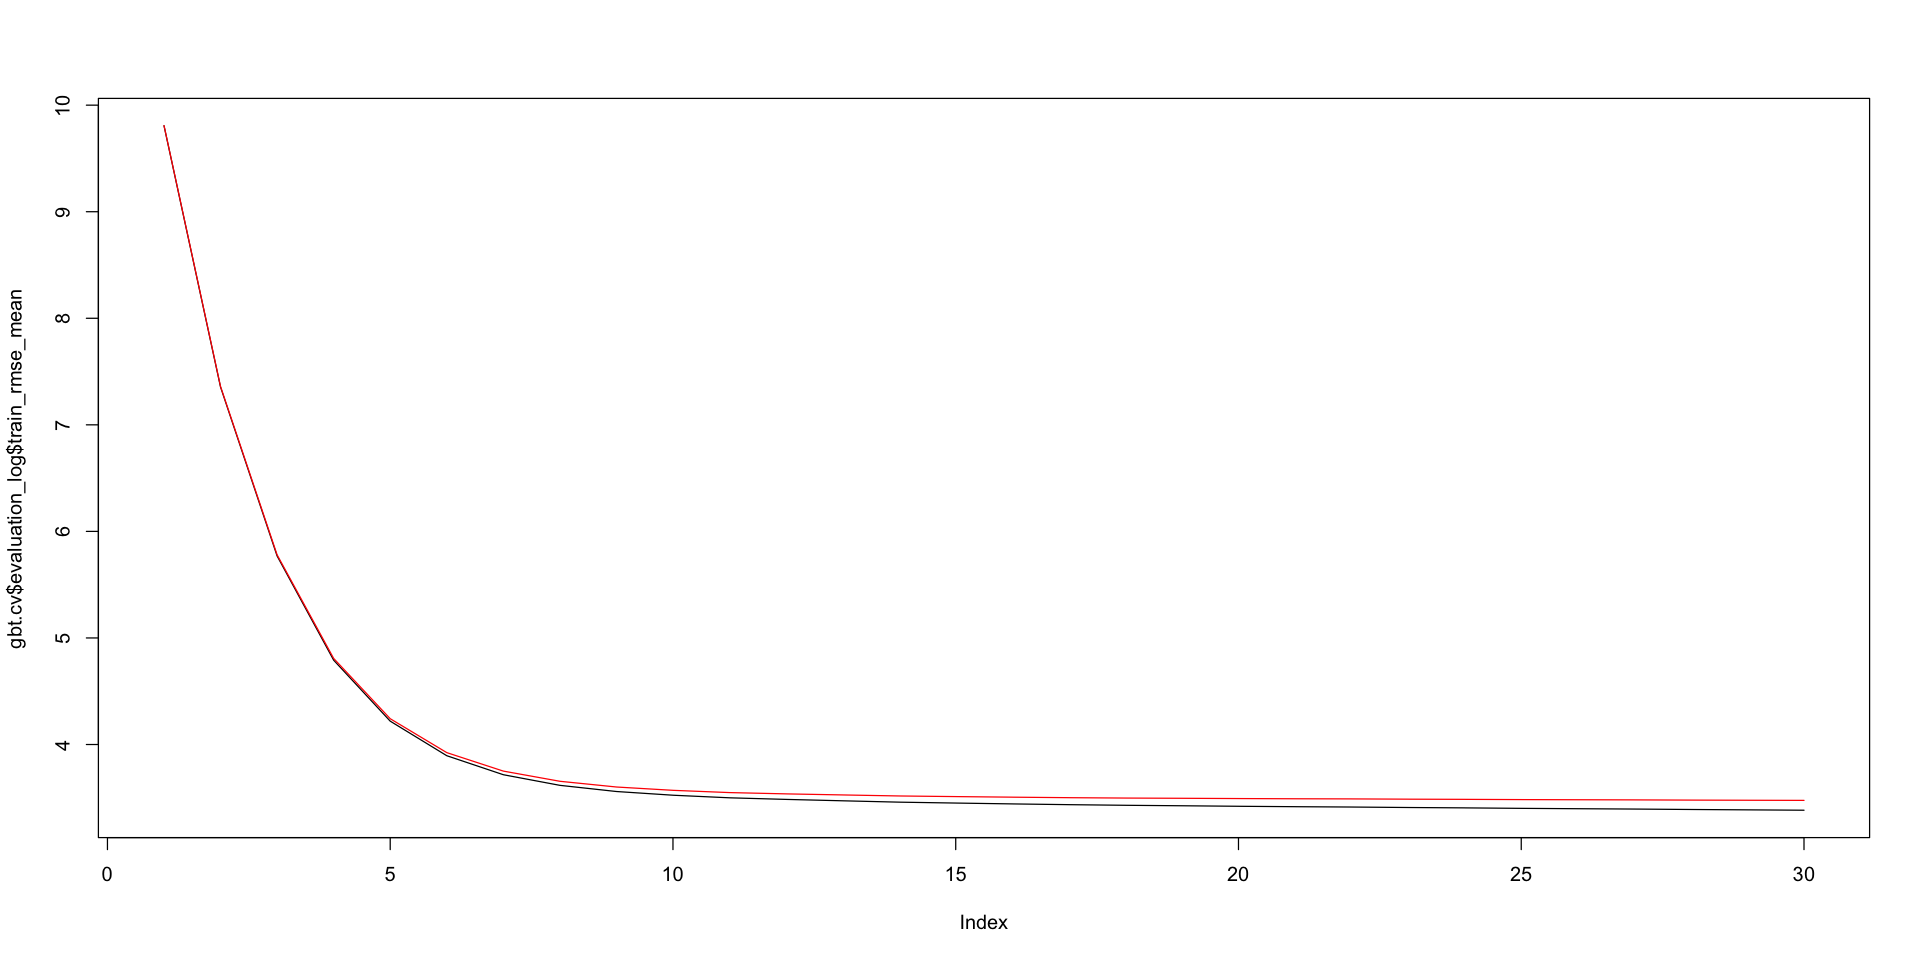

In [113]:
plot(gbt.cv$evaluation_log$train_rmse_mean, type = 'l')
lines(gbt.cv$evaluation_log$test_rmse_mean, col = 'red')
nround = which(gbt.cv$evaluation_log$test_rmse_mean == 
                 min(gbt.cv$evaluation_log$test_rmse_mean)) # 11

In [114]:
# grid searching for parameters.
all_param = NULL
all_test_rmse = NULL
all_train_rmse = NULL

for (iter in 1:20) {
  print(iter)
  param <- list(objective = "reg:linear",
                max_depth = sample(5:12, 1), 
                subsample = runif(1, .6, .9)
                #   eta = runif(1, .01, .3)
                #  gamma = runif(1, 0.0, 0.2),
                #  colsample_bytree = runif(1, .5, .8), 
                #  min_child_weight = sample(1:40, 1),
                #  max_delta_step = sample(1:10, 1)
  )
  cv.nround = 10
  cv.nfold = 5
  set.seed(iter)
  mdcv <- xgb.cv(data=feature.matrix, label = train.label, params = param, 
                 nfold=cv.nfold, nrounds=cv.nround,
                 verbose = T, # early_stop_round=8, 
                 maximize = FALSE)
  min_train_rmse = min(mdcv$evaluation_log$train_rmse_mean)
  min_test_rmse = min(mdcv$evaluation_log$test_rmse_mean)  
  all_param <- rbind(all_param, unlist(param)[-1])
  all_train_rmse <- c(all_train_rmse, min_train_rmse)
  all_test_rmse <- c(all_test_rmse, min_test_rmse)
}
all_param <- as.data.frame(as.numeric(all_param))
cbind(all_param, all_test_rmse)
summary(all_test_rmse[which(all_param == 5)])
summary(all_test_rmse[which(all_param == 12)])

[1] 1
[1]	train-rmse:9.826544+0.000658	test-rmse:9.827620+0.009603 
[2]	train-rmse:7.392618+0.000636	test-rmse:7.394643+0.010371 
[3]	train-rmse:5.826044+0.001114	test-rmse:5.829941+0.010649 
[4]	train-rmse:4.860772+0.001333	test-rmse:4.866724+0.010275 
[5]	train-rmse:4.294507+0.002114	test-rmse:4.302298+0.011735 
[6]	train-rmse:3.976032+0.000973	test-rmse:3.985396+0.009114 
[7]	train-rmse:3.799938+0.000643	test-rmse:3.810883+0.009190 
[8]	train-rmse:3.701204+0.002064	test-rmse:3.713505+0.009560 
[9]	train-rmse:3.643105+0.002048	test-rmse:3.656795+0.009756 
[10]	train-rmse:3.608570+0.001308	test-rmse:3.623184+0.007731 
[1] 2
[1]	train-rmse:9.816176+0.001623	test-rmse:9.817618+0.004604 
[2]	train-rmse:7.371714+0.001316	test-rmse:7.375729+0.002094 
[3]	train-rmse:5.797483+0.001884	test-rmse:5.803649+0.001141 
[4]	train-rmse:4.827421+0.001809	test-rmse:4.836544+0.003036 
[5]	train-rmse:4.257043+0.003073	test-rmse:4.269952+0.004184 
[6]	train-rmse:3.935495+0.003001	test-rmse:3.951195+0.003

as.numeric(all_param),all_test_rmse
6.0000000,3.623184
7.0000000,3.593420
12.0000000,3.564421
5.0000000,3.656040
9.0000000,3.554176
12.0000000,3.572726
5.0000000,3.656643
11.0000000,3.547923
9.0000000,3.557270
12.0000000,3.560404


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.655   3.656   3.656   3.656   3.656   3.657 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.560   3.561   3.564   3.565   3.567   3.573 

In [117]:
param

$objective
[1] "reg:linear"

$max_depth
[1] 12

$subsample
[1] 0.7507329

In [121]:
# then build the model with best parameter combination from the cross validation result.
library(xgboost) 
#select features with importance greater than 0.05
train.sub2.xgb <- train[, c('int_rate','loan_amnt','annual_inc','revol_util',
                       'total_rev_hi_lim','gen_inq_last_6mths')]
train2.label <- train.sub2.xgb$int_rate
# Xgboost model
feature2.matrix <- model.matrix( ~ ., data = train.sub2.xgb[, -1]) 
set.seed(1)
gbt2 <- xgboost(data =  feature2.matrix, 
               label = train2.label, 
               nround = nround,
               params = param)

[1]	train-rmse:9.794186 
[2]	train-rmse:7.327725 
[3]	train-rmse:5.730369 
[4]	train-rmse:4.738575 
[5]	train-rmse:4.154910 
[6]	train-rmse:3.822457 
[7]	train-rmse:3.638229 
[8]	train-rmse:3.536141 
[9]	train-rmse:3.477432 
[10]	train-rmse:3.440837 
[11]	train-rmse:3.414132 
[12]	train-rmse:3.395259 
[13]	train-rmse:3.381457 
[14]	train-rmse:3.367785 
[15]	train-rmse:3.357856 
[16]	train-rmse:3.349263 
[17]	train-rmse:3.341037 
[18]	train-rmse:3.335570 
[19]	train-rmse:3.328843 
[20]	train-rmse:3.323190 
[21]	train-rmse:3.318235 
[22]	train-rmse:3.312892 
[23]	train-rmse:3.308833 
[24]	train-rmse:3.299497 
[25]	train-rmse:3.297539 
[26]	train-rmse:3.291230 
[27]	train-rmse:3.282028 
[28]	train-rmse:3.274324 
[29]	train-rmse:3.269316 
[30]	train-rmse:3.266346 


In [124]:
# prediction
test.data <- test[, c('int_rate','loan_amnt','annual_inc','revol_util',
                       'total_rev_hi_lim','gen_inq_last_6mths')]
prediction <- predict(gbt2, model.matrix( ~ ., data = test.data[, -1]))
sqrt(sum((prediction - test.data$int_rate)^2)/dim(test.data)[1])

[1] 3.594123

Comparing these three models for sum of error square:
tree: 3.7289458909834
random forest: 3.44984758029414
bosting tree: 3.5941227072368
random forest has the smallest error among those three models, but bosting tree model also has good performance with error less than 3.7.
Further model parameters optimization may be necessary to further minimize the error and generate the best tree model.